In [1]:
from keras.layers import Input, Dense, Lambda, Dropout
from keras.layers import LeakyReLU
from keras.models import Model,save_model,load_model
from keras.objectives import binary_crossentropy
from keras.callbacks import LearningRateScheduler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras.backend as K
import tensorflow as tf
from sklearn import preprocessing
import keras.optimizers
from tensorflow import set_random_seed
from numpy.random import seed
from sklearn.model_selection import train_test_split
import seaborn as sns

# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


Using TensorFlow backend.


     |████████████████████████████████| 993kB 3.5MB/s 


W0701 15:21:39.635192 140376799819648 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [0]:
from keras.regularizers import l2

In [0]:
link="https://drive.google.com/open?id=1hb6IP0AqPJ_0-uL_7YcdDVNRpZ58jmfp"

In [6]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('cleaned_data.csv')  
df3 = pd.read_csv('cleaned_data.csv')

1hb6IP0AqPJ_0-uL_7YcdDVNRpZ58jmfp


In [7]:
df3

,DateTime,Temp1,Temp2,Temp3,Temp4,Temp5,Temp6,Temp7,Temp8,Temp9,Temp10,Temp11,Temp12,Temp13,Temp14,Temp15,Temp16,Temp17,Temp18,Temp19,Temp20,Temp21,Temp22,Temp23,Temp24,Temp25,Temp26,Temp27,Temp28,Temp29,Temp30,Temp31,Temp32,Temp33,Temp34,Temp35,Temp36,Temp37,Temp38,Temp39,...,Temp1550,Temp1551,Temp1552,Temp1553,Temp1554,Temp1555,Temp1556,Temp1557,Temp1558,Temp1559,Temp1560,Temp1561,Temp1562,Temp1563,Temp1564,Temp1565,Temp1566,Temp1567,Temp1568,Temp1569,Temp1570,Temp1571,Temp1572,Temp1573,Temp1574,Temp1575,Temp1576,Temp1577,Temp1578,Temp1579,Temp1580,Temp1581,Temp1582,Temp1583,Temp1584,Temp1585,Temp1586,Temp1587,Temp1588,DateTime.1
0,2019-01-29 00:00:00,341.542,18.392,-8.190,0.0,22.992,0.0,16.8,0.0,-17.870,1.0,0.0,0.0,29.56,0.003,74.36,1149.902,50.474,0.806,0.425,1.0,64.13,334.019,0.0,0.924,46.094,0.0,585.75,0.0,1.0,14.880,0.0,0.0,76.032,51.16,0.0,7.617,514.194,30.212,-5.0,...,74.14,0.0,0.0,0.0,0.0,-0.27,0.0,0.0,6.109,27.100,577.39,66.736,0.0,14.209,-10.007,0.372,105.0,346.518,534.38,0.0,0.0,0.0,0.0,14.0,28.798,0.0,-0.03,26.537,3371864.0,34.36,59.473,577.28,0.085,1.0,4.297,67.18,0.0,65.34,NaN,2019-01-29 00:00:00
1,2019-01-29 00:00:01,341.542,18.392,-8.190,0.0,22.992,0.0,16.8,0.0,-17.870,1.0,0.0,0.0,29.56,0.003,74.36,1161.621,50.474,0.830,0.425,1.0,64.13,334.019,0.0,0.924,46.094,0.0,585.75,0.0,1.0,14.880,0.0,0.0,76.032,51.16,0.0,7.617,514.194,27.527,-5.0,...,74.14,0.0,0.0,0.0,0.0,-0.27,0.0,0.0,6.109,26.953,577.39,68.079,0.0,14.136,-10.007,0.372,105.0,346.518,534.38,0.0,0.0,0.0,0.0,14.0,28.798,0.0,-0.03,26.537,3371864.0,34.36,59.668,577.28,0.128,1.0,4.395,67.18,0.0,65.34,NaN,2019-01-29 00:00:01
2,2019-01-29 00:00:02,341.542,18.392,-8.190,0.0,22.992,0.0,16.8,0.0,-17.870,1.0,0.0,0.0,29.56,0.003,74.36,1161.621,50.474,0.830,0.425,1.0,64.13,334.019,0.0,0.924,46.094,0.0,585.75,0.0,1.0,14.880,0.0,0.0,76.032,51.16,0.0,7.617,514.194,27.527,-5.0,...,74.14,0.0,0.0,0.0,0.0,-0.27,0.0,0.0,6.109,26.953,577.39,68.079,0.0,14.136,-10.007,0.372,105.0,346.518,534.38,0.0,0.0,0.0,0.0,14.0,28.798,0.0,-0.03,26.537,3371864.0,34.36,59.668,577.28,0.128,1.0,4.395,67.18,0.0,65.34,NaN,2019-01-29 00:00:02
3,2019-01-29 00:00:03,341.542,18.392,-8.190,0.0,22.992,0.0,16.8,0.0,-17.870,1.0,0.0,0.0,29.56,0.003,74.36,1161.621,50.474,0.830,0.425,1.0,64.13,334.019,0.0,0.810,46.094,0.0,585.75,0.0,1.0,14.880,0.0,0.0,76.032,51.16,0.0,7.617,514.194,27.527,-5.0,...,74.14,0.0,0.0,0.0,0.0,-0.27,0.0,0.0,6.109,26.953,577.39,68.079,0.0,14.136,-10.007,0.372,105.0,346.518,534.38,0.0,0.0,0.0,0.0,14.0,28.798,0.0,-0.03,26.537,3371864.0,34.36,59.668,577.28,0.128,1.0,4.395,67.18,0.0,65.34,NaN,2019-01-29 00:00:03
4,2019-01-29 00:00:04,341.542,18.392,-8.190,0.0,22.992,0.0,16.8,0.0,-17.870,1.0,0.0,0.0,29.56,0.003,74.36,1144.043,50.474,0.830,0.425,1.0,64.13,334.019,0.0,0.810,46.094,0.0,585.75,0.0,1.0,14.880,0.0,0.0,76.032,51.16,0.0,7.617,514.194,27.527,-5.0,...,74.14,0.0,0.0,0.0,0.0,-0.27,0.0,0.0,6.109,26.953,577.39,68.079,0.0,14.136,-10.007,0.372,105.0,346.518,534.38,0.0,0.0,0.0,0.0,14.0,28.798,0.0,-0.03,26.537,3371864.0,34.36,59.668,577.28,0.128,1.0,4.395,67.18,0.0,65.34,NaN,2019-01-29 00:00:04
5,2019-01-29 00:00:05,341.542,18.392,-8.190,0.0,22.992,0.0,16.8,0.0,-17.870,1.0,0.0,0.0,29.56,0.003,74.36,1144.043,50.474,0.830,0.425,1.0,64.13,334.019,0.0,0.810,46.094,0.0,585.75,0.0,1.0,14.880,0.0,0.0,76.032,51.16,0.0,7.617,514.194,27.527,-5.0,...,74.14,0.0,0.0,0.0,0.0,-0.27,0.0,0.0,6.109,26.953,577.39,68.079,0.0,14.136,-10.007,0.372,105.0,346.518,534.38,0.0,0.0,0.0,0.0,14.0,28.798,0.0,-0.03,26.537,3371864.0,34.36,59.668,577.28,0.128,1.0,4.395,67.18,0.0,65.34,NaN,2019-01-29 00:00:05
6,2019-01-29 00:00:06,341.542,18.392,-8.190,0.0,22.992,0.0,16.8,0.0,-17.870,1.0,0.0,0.0,29.56,0.003,74.36,1144.043,50.474,0.830,0.425,1.0,64.13,334.019,0.0,0.810,46.094,0.0,585.75,0.0,1.0,14.880,0.0,0.0,76.032,51.16,0.0,7.617,514.194,27.527,-5.0,...,74.14,0.0,0.0,0.0,0.0,-0.27,0.0,0.0,6.109,26.953,577.39,68.079,0.0,14.136,-10.007,0.372,105.0,346.518,534.38,0.0,0.0,0.0,0.0,14.0,28.798,0.0,-0.03,26.537,3371864.0,34.36,

In [0]:
#-------Data Preproccessing-------#
def preprocess(df):

    index=df[:,0]
    preprocessed_data=df[:,1:]
    scaler = preprocessing.MinMaxScaler()
    preprocessed_data = scaler.fit_transform(preprocessed_data)
    bol=np.equal.reduce(preprocessed_data)
    bol=np.invert(bol)
    #print(bol.shape)
    preprocessed_data=preprocessed_data[:,bol]
    mask = np.all(np.isnan(preprocessed_data), axis=1)
    mask=np.invert(mask)
    preprocessed_data=preprocessed_data[mask]
    #print(np.sum(bol))
    index=index[mask]
    return index,preprocessed_data,bol




In [0]:
df3.shape
df3=np.asarray(df3.iloc[:,0:-1])
df3

array([['2019-01-29 00:00:00', 341.542, 18.392, ..., 0.0, 65.34, nan],
       ['2019-01-29 00:00:01', 341.542, 18.392, ..., 0.0, 65.34, nan],
       ['2019-01-29 00:00:02', 341.542, 18.392, ..., 0.0, 65.34, nan],
       ...,
       ['2019-01-29 23:59:57.020', 343.162, 18.687, ..., 0.0, 63.8, nan],
       ['2019-01-29 23:59:58.020', 343.162, 18.687, ..., 0.0, 63.8, nan],
       ['2019-01-29 23:59:59.020', 343.162, 18.687, ..., 0.0, 63.8, nan]],
      dtype=object)

W0701 04:55:27.034387 140083568637824 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0701 04:55:27.036543 140083568637824 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0701 04:55:27.041719 140083568637824 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0701 04:55:27.066164 140083568637824 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0701 04:55:27.076825 

Epoch 1/20
86400/86400 [==============================] - 5s 56us/step - loss: 145.6953
Epoch 2/20
86400/86400 [==============================] - 4s 43us/step - loss: 136.9136
Epoch 3/20
86400/86400 [==============================] - 4s 42us/step - loss: 136.3364
Epoch 4/20
86400/86400 [==============================] - 4s 42us/step - loss: 136.0371
Epoch 5/20
86400/86400 [==============================] - 4s 42us/step - loss: 135.9348
Epoch 6/20
86400/86400 [==============================] - 4s 43us/step - loss: 135.7177
Epoch 7/20
86400/86400 [==============================] - 4s 42us/step - loss: 135.6255
Epoch 8/20
86400/86400 [==============================] - 4s 42us/step - loss: 135.5766
Epoch 9/20
86400/86400 [==============================] - 4s 42us/step - loss: 135.4714
Epoch 10/20
86400/86400 [==============================] - 4s 42us/step - loss: 135.5419
Epoch 11/20
86400/86400 [==============================] - 4s 43us/step - loss: 135.4740
Epoch 12/20
86400/86400 [=====

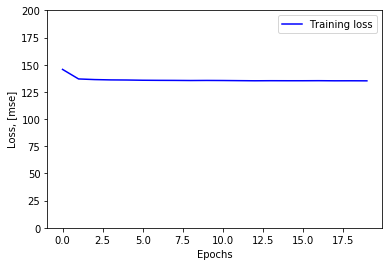

In [0]:
#----------Training----------#
def model_create(data,m=50,n_z=6,n_epoch=100,split=0.1):
    input_shape=data.shape[1]
    i_s1=round(input_shape*0.75)
    i_s2=round(input_shape*0.5)
    i_s3=round(input_shape*0.25)

    #dat=data
    #train_data, test_data = train_test_split(data, test_size=0.3, random_state=0)

    #split=int(np.round(0.7*data.shape[0]))
    #print("split--",split,"   ",m)
    #test_data=data[split:]
    #train_data=data[:split]
    

    #train_data=data
    #test_data=data

    #data_test=data[7500:]
    #data=data[0:7500]
    
    def leakyrelu(x):
      return K.maximum(0.3*x,x)

    seed(10)
    set_random_seed(10)

    # Q(z|X) -- encoder
    inputs = Input(shape=(input_shape,))
    #h_q1 = Dense(i_s1, activation='LeakyRelu')(inputs)
    h_q1 = Dense(i_s1, activation=leakyrelu)(inputs)
    h_q2 = Dropout(0.1)(h_q1)
    h_q3 = Dense(i_s2, activation=leakyrelu)(h_q2)
    h_q4 = Dropout(0.1)(h_q3)
    h_q5 = Dense(i_s3, activation=leakyrelu)(h_q4)
    h_q = h_q2 = Dropout(0.1)(h_q5)
    #h_q = Dense(n_z, activation='LeakyRelu')(h_q6)
    mu = Dense(n_z, activation='sigmoid')(h_q)
    log_sigma = Dense(n_z, activation='sigmoid')(h_q)
    
    
    '''
    # Q(z|X) -- encoder
    inputs = Input(shape=(input_shape,))
    #h_q1 = Dense(i_s1, activation='LeakyRelu')(inputs)
    h_q1 = Dense(i_s1)(inputs)
    a=LeakyReLU(alpha=0.1)(h_q1)
    h_q2 = Dropout(0.1)(a)
    h_q3 = Dense(i_s2)(h_q2)
    b=LeakyReLU(alpha=0.1)(h_q3)
    h_q4 = Dropout(0.1)(b)
    h_q5 = Dense(i_s3)(h_q4)
    c=LeakyReLU(alpha=0.1)(h_q5)
    h_q = h_q2 = Dropout(0.1)(c)
    #h_q = Dense(n_z, activation='LeakyRelu')(h_q6)
    mu = Dense(n_z, activation='sigmoid')(h_q)
    log_sigma = Dense(n_z, activation='sigmoid')(h_q)
    '''
    def sample_z(args):
        mu, log_sigma = args
        eps = K.random_normal(shape=(m, n_z), mean=0., stddev=1.)
        return mu + K.exp(log_sigma / 2) * eps

    # Sample z ~ Q(z|X)
    z = Lambda(sample_z)([mu, log_sigma])
    
    decoder_hidden = Dense(i_s3, activation=leakyrelu)
    d_q = Dropout(0.1)
    d_q1 = Dense(i_s2, activation=leakyrelu)
    d_q2 = Dropout(0.1)
    d_q3 = Dense(i_s1, activation=leakyrelu)
    d_q4 = Dropout(0.1)
    decoder_out = Dense(input_shape, activation='sigmoid')

    h_p = decoder_hidden(z)
    h_p1 = d_q(h_p)
    h_p2 = d_q1(h_p1)
    h_p3 = d_q2(h_p2)
    h_p4 = d_q3(h_p3)
    h_p5 = d_q4(h_p4)
    outputs = decoder_out(h_p3)
    
    
    
    def vae_loss(y_true, y_pred):
        recon = K.sum(K.binary_crossentropy(y_true, y_pred), axis=1)
        kl = 0.5 * K.sum(K.exp(log_sigma) + K.square(mu) - 1. - log_sigma, axis=1)
        return (recon + kl)

    vae = Model(inputs, outputs)
    encoder = Model(inputs, mu)
    d_in = Input(shape=(n_z,))
    d_h = decoder_hidden(d_in)
    d_h1 = d_q(d_h)
    d_h2 = d_q1(d_h1)
    d_h3 = d_q2(d_h2)
    d_out = decoder_out(d_h3)
    decoder = Model(d_in, d_out)
    opt = keras.optimizers.Adam(lr=0.001)
    vae.compile(optimizer=opt, loss=vae_loss)
    history = vae.fit(data, data, batch_size=m, epochs=n_epoch,verbose=1)
    #history = vae.fit(data, data, batch_size=m, epochs=n_epoch, validation_data=(data_test, data_test), verbose=1)

    plt.plot(history.history['loss'], 'b', label='Training loss')
    #plt.plot(history.history['val_loss'], 'r', label='Validation loss')
    plt.legend(loc='upper right')
    plt.xlabel('Epochs')
    plt.ylabel('Loss, [mse]')
    plt.ylim([0, 200])
    plt.show()
    pred = vae.predict(data,m)
    #test_pred = vae.predict(test_data,m)
    #return pred,test_pred,test_data
    return pred

#pred,test_pred,test_data = model_create(data,m=200,n_z=6,n_epoch=100,split=0.0)
pred = model_create(data,m=800,n_z=10,n_epoch=20,split=0.0)


In [0]:
df3=np.asarray(df3)
index,data,bol=preprocess(df3)

print(data.shape)
print(index.shape)
print(data)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:355: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:356: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


(86400, 230)
(86400,)
[[0.80863449 0.0284951  0.42857143 ... 0.12539185 0.68758003 0.875     ]
 [0.80863449 0.0284951  0.42857143 ... 0.12539185 0.7503201  0.875     ]
 [0.80863449 0.0284951  0.42857143 ... 0.12539185 0.7503201  0.875     ]
 ...
 [0.82925055 0.05765806 0.38095238 ... 0.21003135 0.62483995 0.        ]
 [0.82925055 0.05765806 0.38095238 ... 0.21003135 0.62483995 0.        ]
 [0.82925055 0.05765806 0.38095238 ... 0.21003135 0.62483995 0.        ]]


In [0]:
def vae_loss(y_true, y_pred):
    y_true=tf.convert_to_tensor(y_true,preferred_dtype=tf.float64)
    y_pred = tf.convert_to_tensor(y_pred,preferred_dtype=tf.float64)
    recon = K.sum(K.binary_crossentropy(y_true, y_pred), axis=1)
    return recon

loss=vae_loss(data, pred)
#test_loss=vae_loss(test_data, test_pred)
with tf.Session() as s:
    global sav
    #global test_sav
    sav=np.round(s.run(loss),2)
    #test_sav = np.round(s.run(test_loss), 2)
    #np.savetxt("loss_finalll.csv",sav, delimiter=",")
    #np.savetxt("loss_test_time_200.csv", test_sav, delimiter=",")

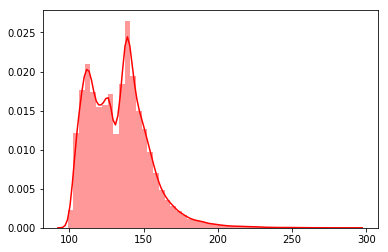

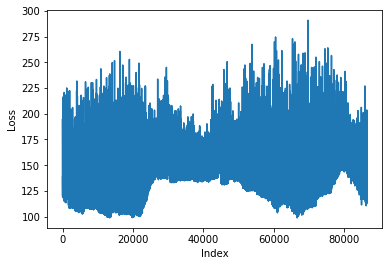

In [0]:
#arr=sav>150
#print(index[arr])
def plot(data):
    #print(data.shape[0])
    #time = data.shape[0]
    position = data
    plt.plot(position)
    plt.xlabel('Index')
    plt.ylabel('Loss')
    plt.show()

def plot11(data,data_test):
    #print(data.shape[0])
    sns.distplot(data,color="red",);
    sns.distplot(data_test,color="blue");
    plt.show()
#
#
#
#df=pd.read_csv(r"loss_finalll.csv",delimiter=";",header=None)
# # df_test=pd.read_csv(r"loss_test_time_200.csv",delimiter=";",header=None)
#dft=np.asarray(df)
# # dft_test=np.asarray(df_test)
#plot11(sav,test_sav)
#plot(test_sav)
sns.distplot(sav,color="red",);
plt.show()
plot(sav)
#df=pd.read_csv(r"loss1.csv",delimiter=";",header=None)
#plot(dft)
# df=np.asarray(df)
# arr=df>150
# df=df[arr]
# print(df)


In [0]:
#ana_index=index[sav>160]
#ana_data=data[sav>160]

aray=sav>250
inv=np.invert(aray)
inv=np.nonzero(inv)
inv=np.asarray(inv)
hel=np.nonzero(aray)
hel=(np.asarray(hel))
hel=np.reshape(hel,hel.shape[1])
inv=np.reshape(inv,inv.shape[1])
print(inv.shape)
print(hel.shape)
#per_index=index[sav<150]
#per_data=data[sav<150]
#print(ana_index.shape)
#print(ana_data.shape)
#print(per_index.shape)
#print(per_data.shape)

(86376,)
(24,)


In [0]:
window=200
prev=hel[0]-1

av=data[prev-window:prev]
diff=0
lis=[]
for i in range(hel.shape[0]):
  if((prev+1)!=hel[i]):
    diff=(hel[i-1]-hel[i]-1)
    if(diff<200):
      for j in range(diff):
        np.delete(av, 0, axis=0)
        av.append(data[hel[i+1+j]])
    else:
      av=data[hel[i-window]:hel[i]]
    mean_av=np.mean(av,axis=0)
    lis.append(np.abs(mean_av-data[hel[i]]))
  else:
    mean_av=np.mean(av,axis=0)
    lis.append(np.abs(mean_av-data[hel[i]]))
     
lis=np.asarray(lis)
print(lis.shape)



#print(data.shape)
#print(df3.shape)
#print(index.shape)
#print(bol.shape)
#print(np.sum(bol))

(24, 230)


In [0]:
sensors=np.arange(bol.shape[0])+1
sensors=sensors[bol]
#print(425*230)
#print(np.sum(lis>0.1))
#np.max(lis,axis=0)
lis2=lis
vec=np.sum(lis,axis=1)
#print(vec.shape)
lis2=(lis/vec[:,None])*100
print(lis2.shape)
#print(lis2)
gre=lis2>1
print(gre.shape)
ana_sensors=[]
ana_per=[]
j=0
for i in gre:
  temp=lis2[j]  
  ana_sensors.append(sensors[i])
  ana_per.append(temp[i])
  j=j+1
ana_index=index[aray]

print(ana_index)
print(ana_index.shape)
print(ana_sensors)
print(ana_per)
#print(size(ana_per))
#print(dim(ana_sensors))

(24, 230)
(24, 230)
['2019-01-29 04:05:51.003' '2019-01-29 04:31:25.004'
 '2019-01-29 05:16:14.004' '2019-01-29 12:58:58.011'
 '2019-01-29 14:57:04.013' '2019-01-29 16:42:43.014'
 '2019-01-29 16:47:52.014' '2019-01-29 16:52:13.014'
 '2019-01-29 17:01:19.014' '2019-01-29 17:17:16.015'
 '2019-01-29 18:08:04.015' '2019-01-29 18:11:27.015'
 '2019-01-29 18:15:37.015' '2019-01-29 18:19:08.015'
 '2019-01-29 18:23:07.015' '2019-01-29 18:36:14.016'
 '2019-01-29 18:57:53.016' '2019-01-29 19:07:17.016'
 '2019-01-29 19:21:35.016' '2019-01-29 19:58:40.017'
 '2019-01-29 20:15:02.017' '2019-01-29 20:41:28.017'
 '2019-01-29 20:55:00.018' '2019-01-29 21:12:20.018']
(24,)
[array([  27,   83,   89,   92,  128,  189,  380,  425,  442,  496,  540,
        597,  843,  844,  852,  956,  958, 1139, 1146, 1148, 1184, 1211,
       1432, 1480, 1485, 1487, 1509]), array([  73,  124,  128,  153,  162,  168,  338,  380,  425,  467,  485,
        540,  597,  656,  763,  770,  844,  948,  956,  967, 1011, 1121,
     

NameError: ignored

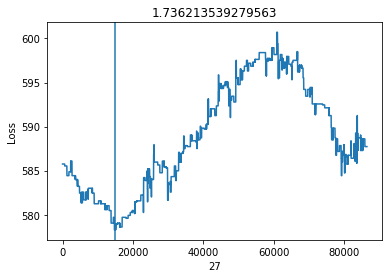

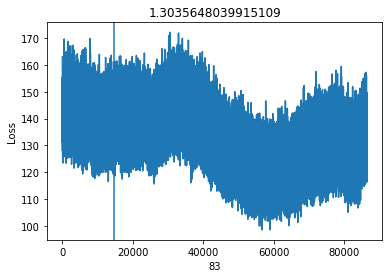

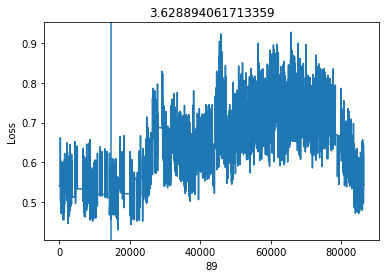

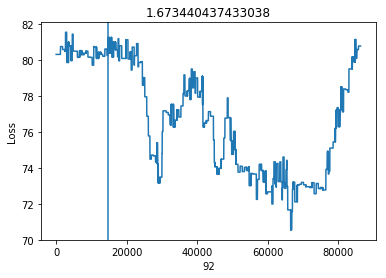

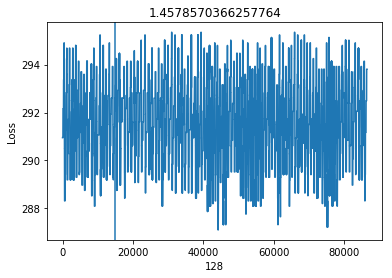

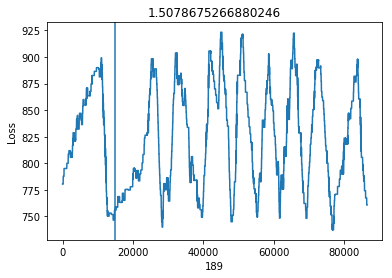

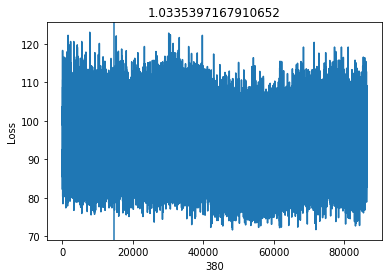

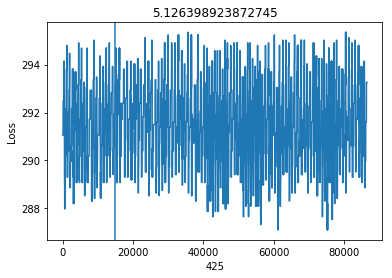

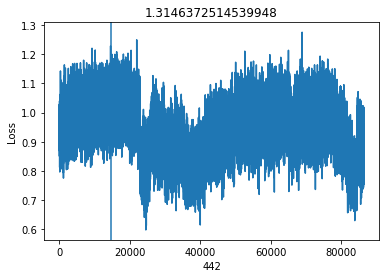

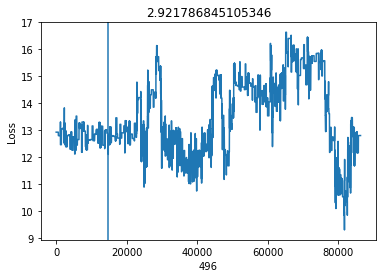

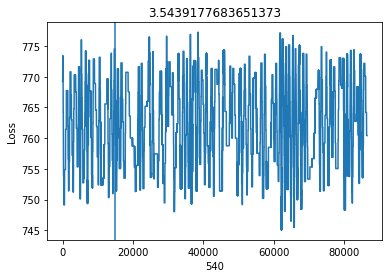

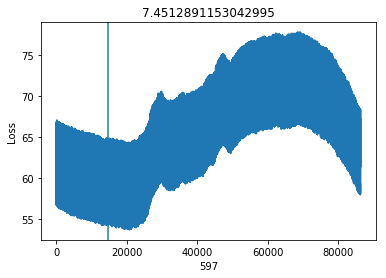

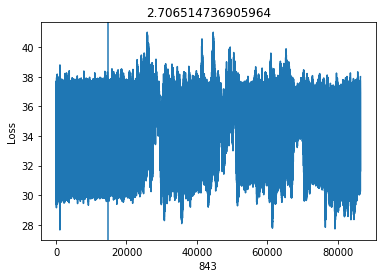

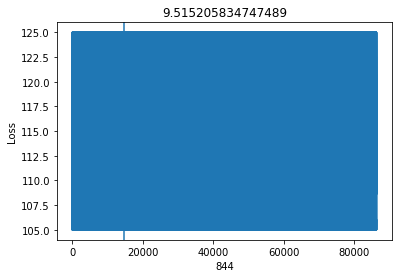

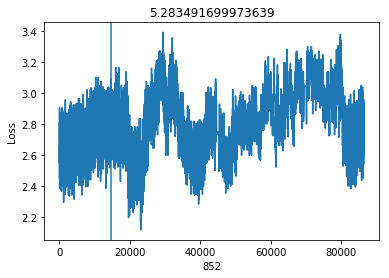

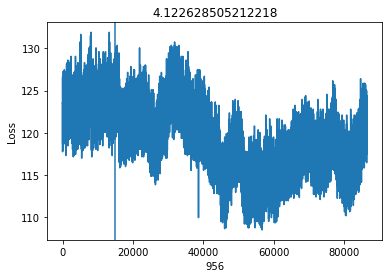

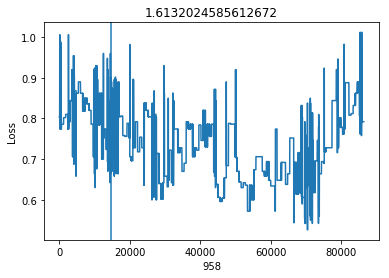

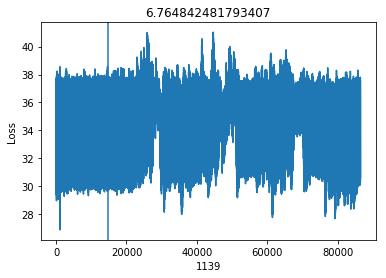

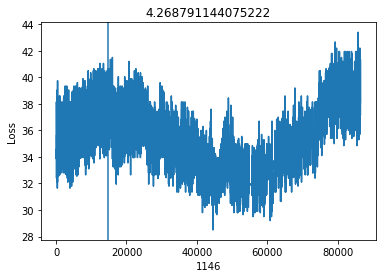

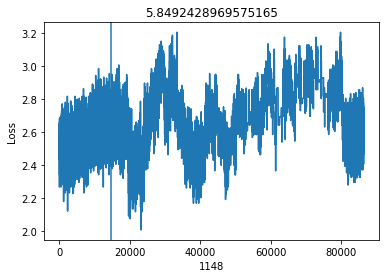

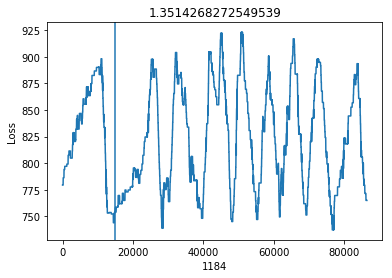

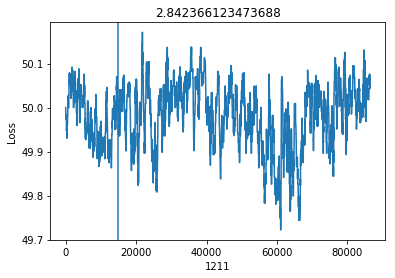

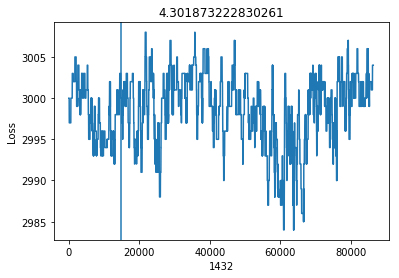

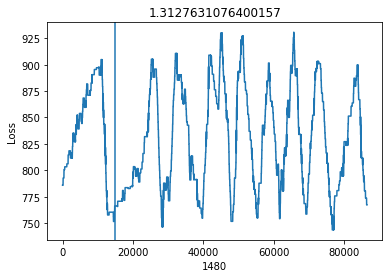

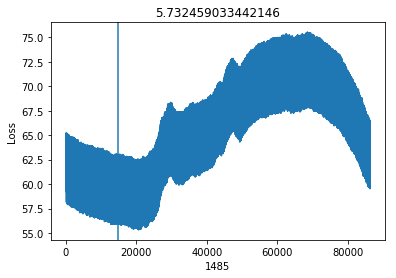

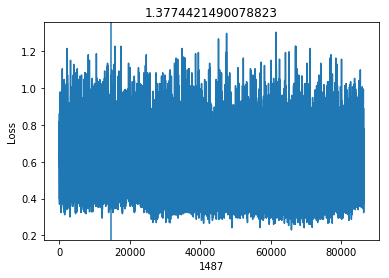

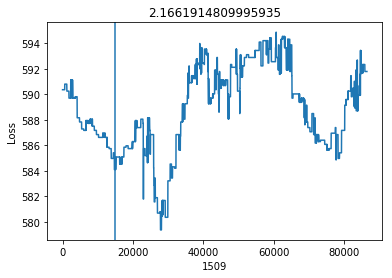

-------------------------------------------------------------------



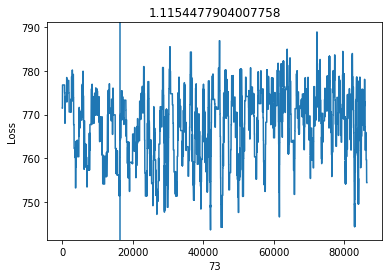

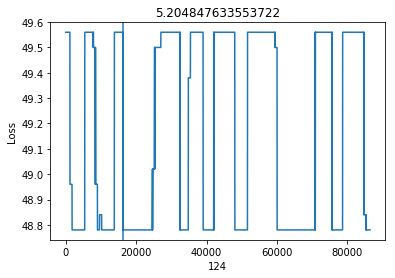

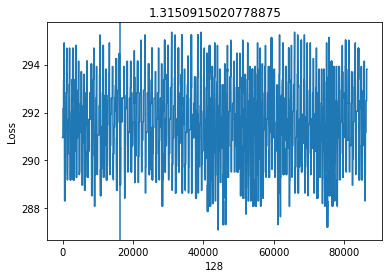

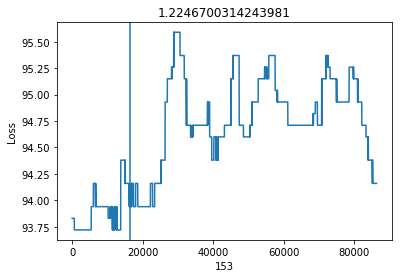

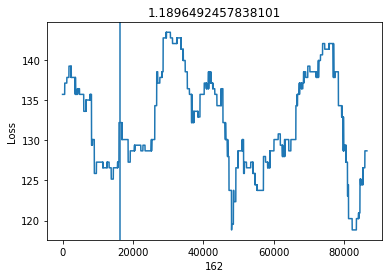

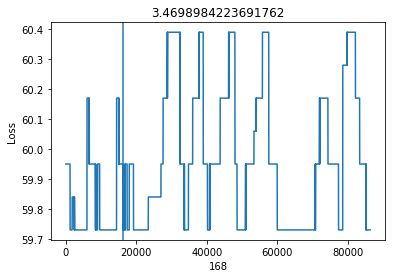

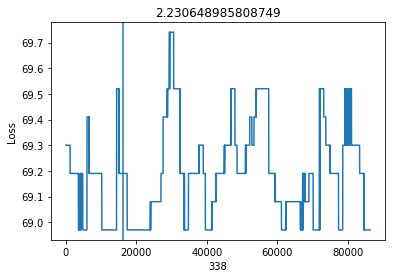

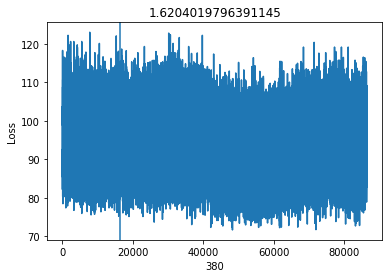

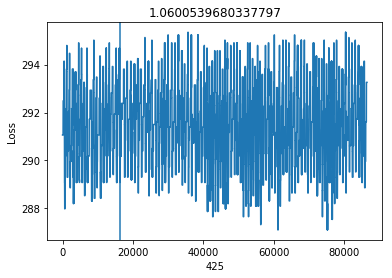

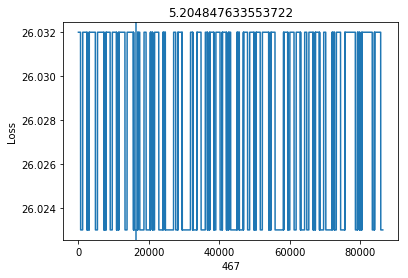

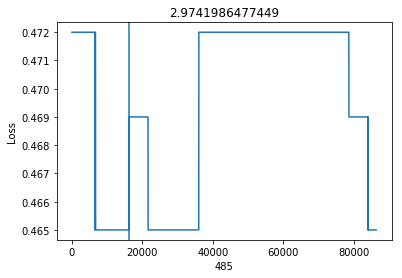

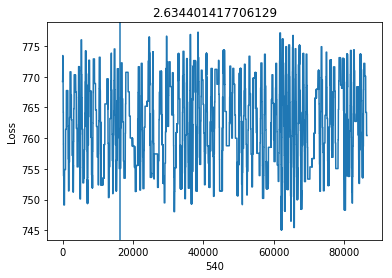

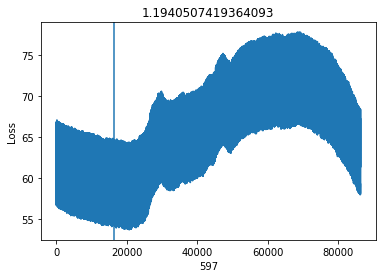

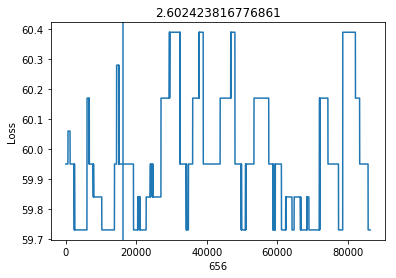

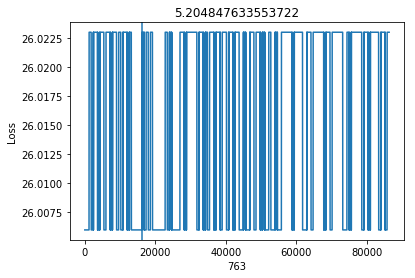

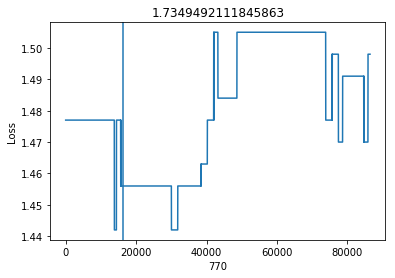

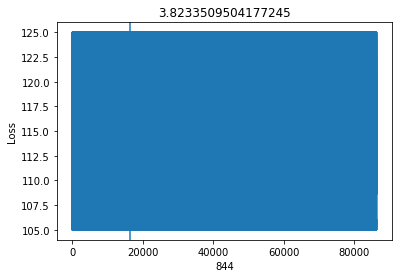

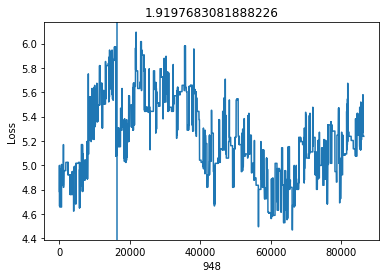

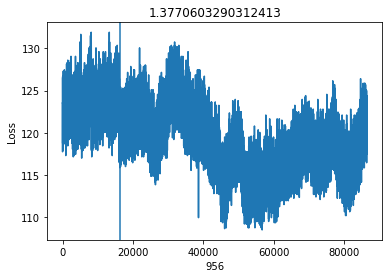

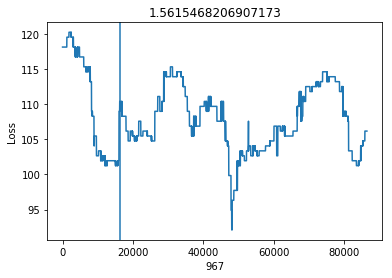

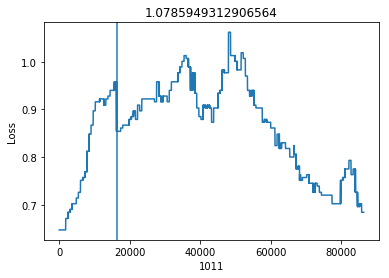

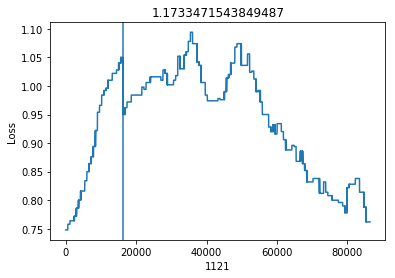

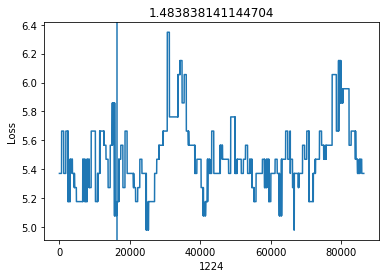

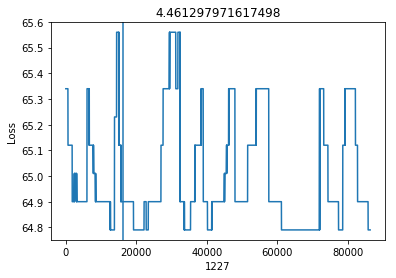

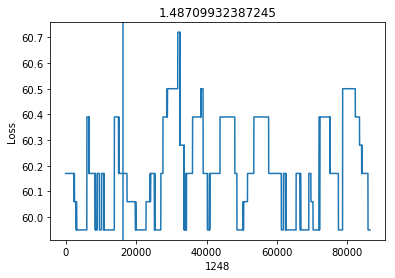

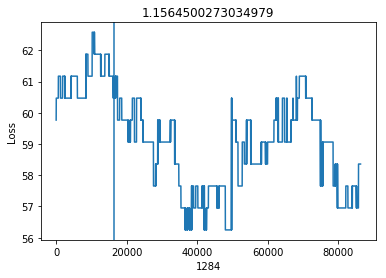

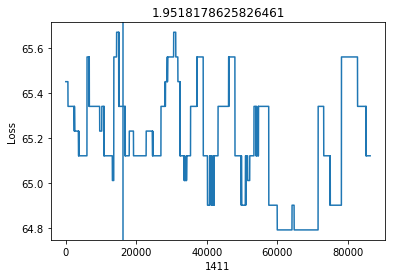

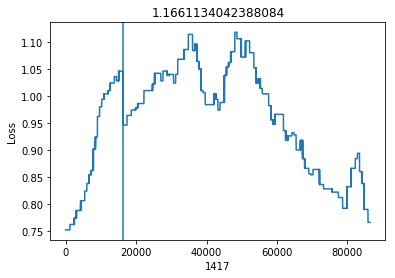

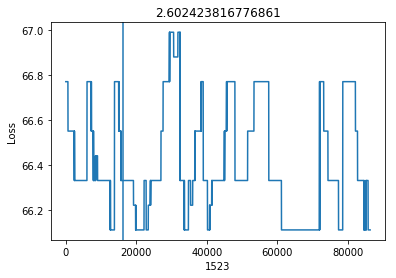

-------------------------------------------------------------------



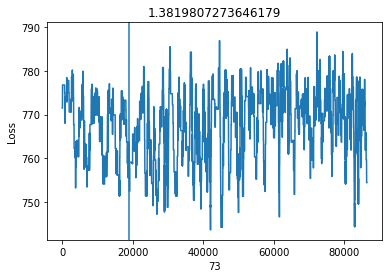

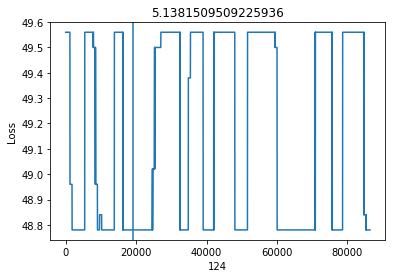

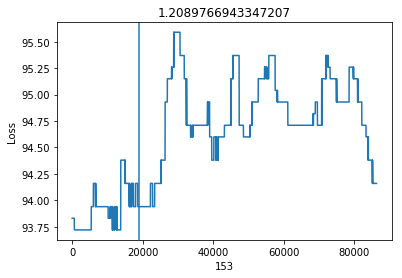

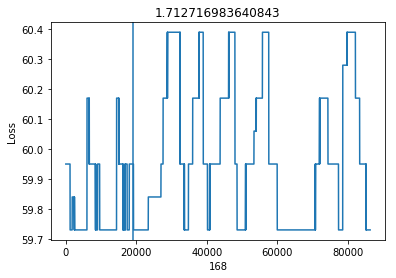

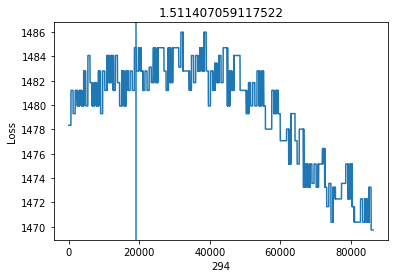

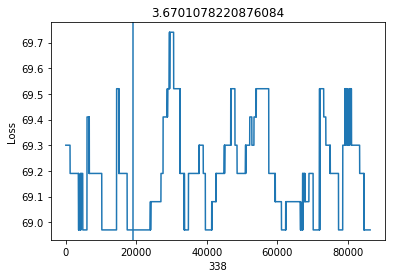

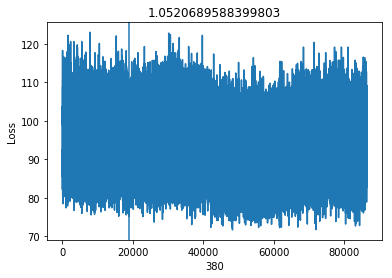

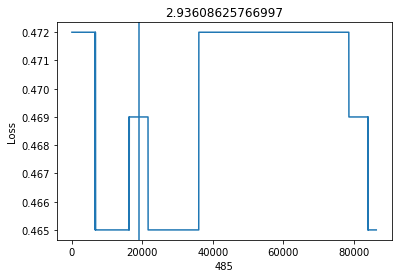

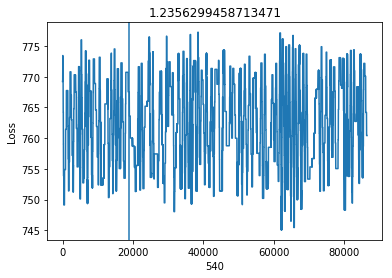

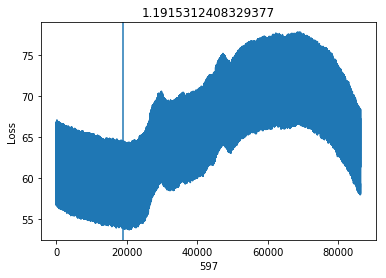

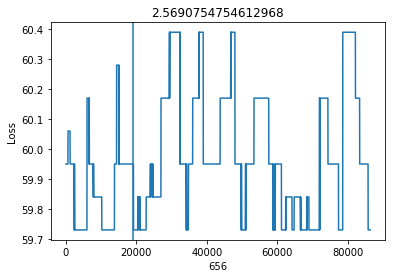

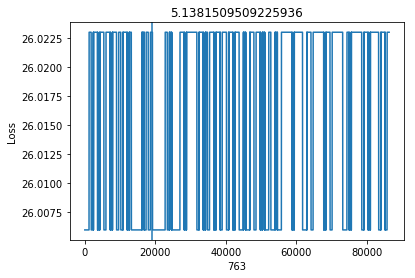

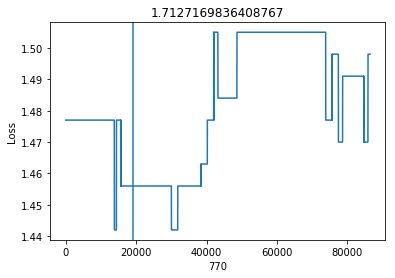

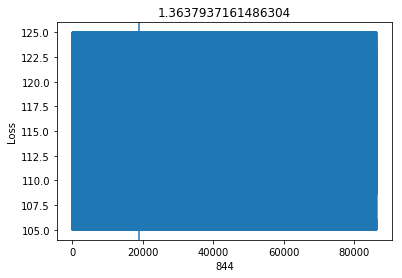

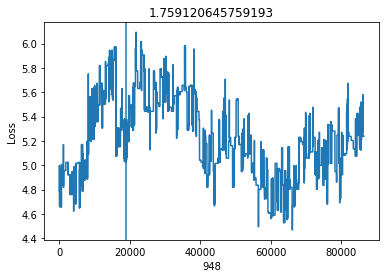

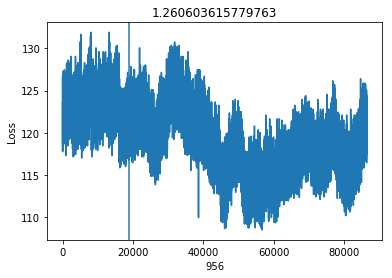

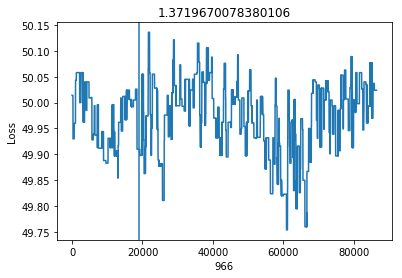

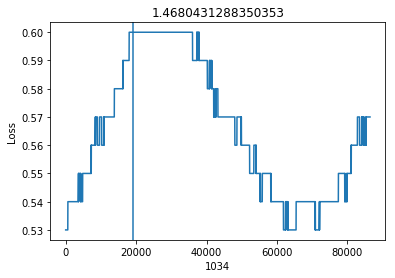

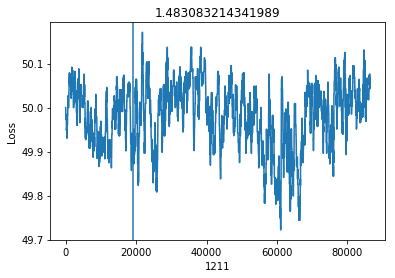

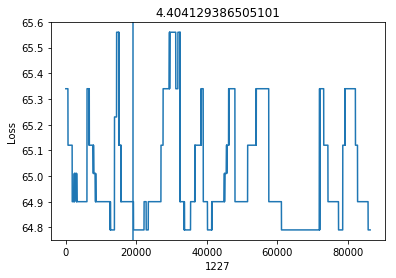

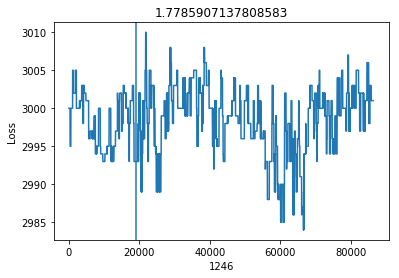

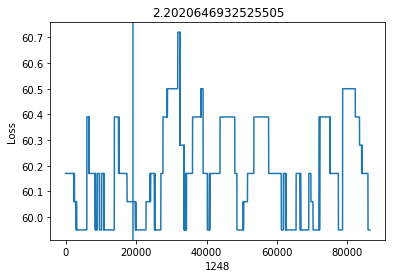

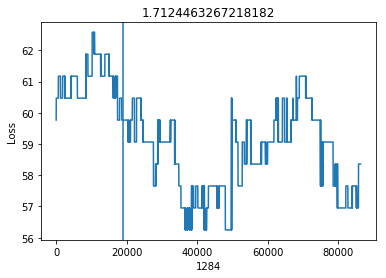

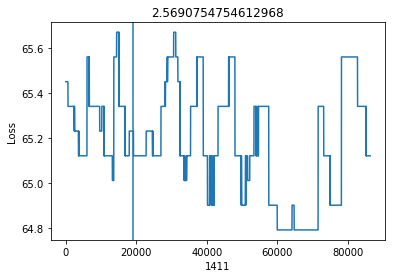

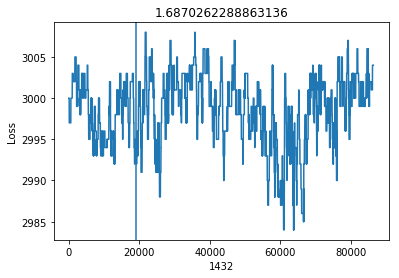

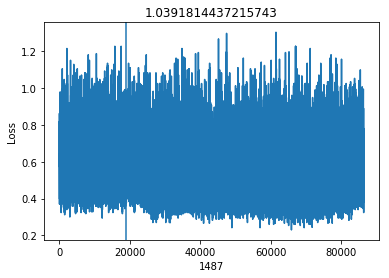

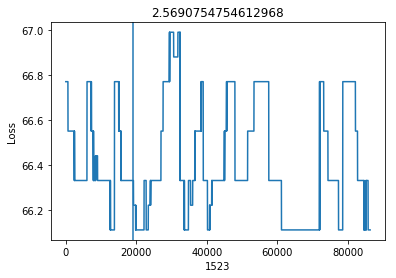

-------------------------------------------------------------------



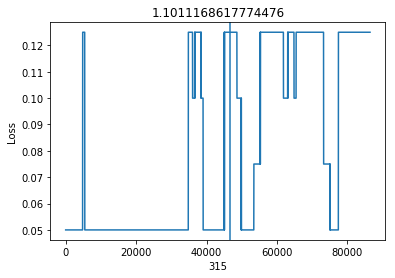

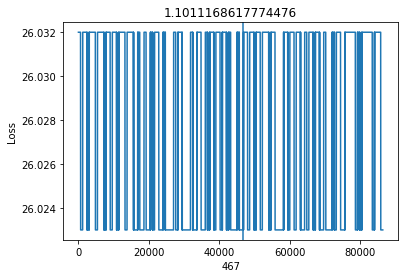

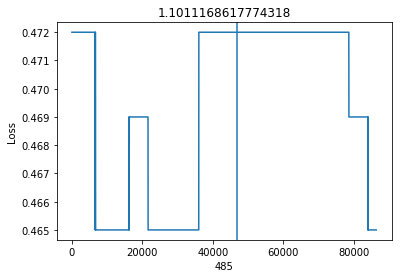

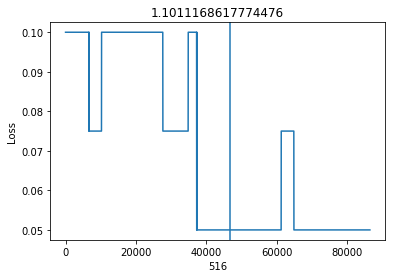

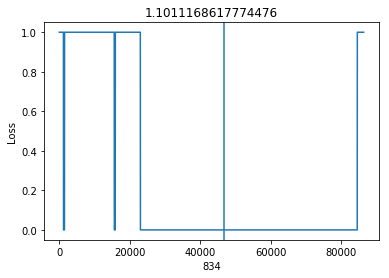

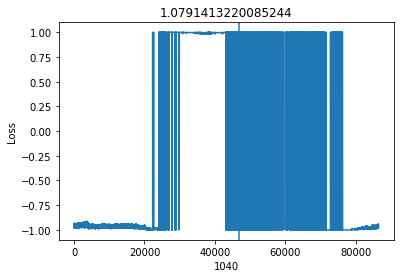

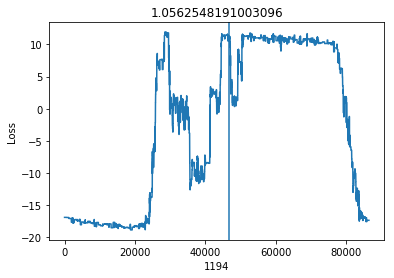

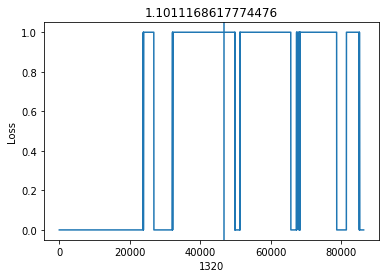

-------------------------------------------------------------------



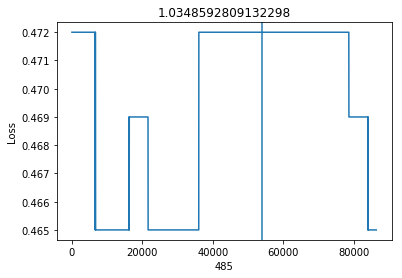

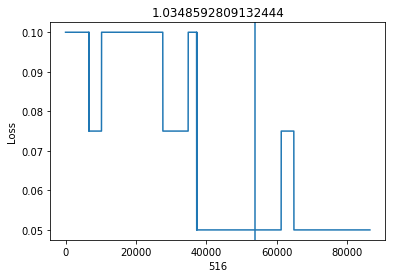

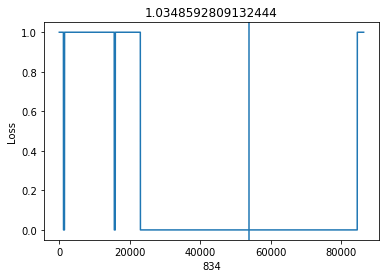

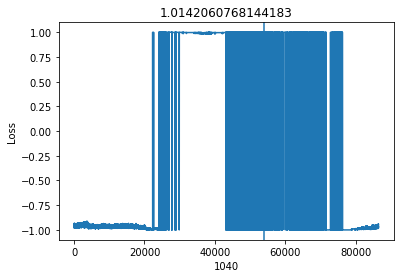

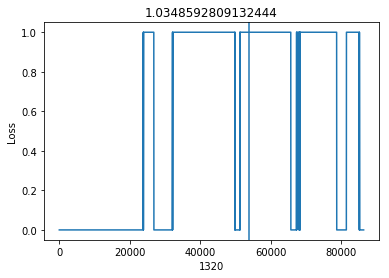

-------------------------------------------------------------------

-------------------------------------------------------------------

-------------------------------------------------------------------

-------------------------------------------------------------------

-------------------------------------------------------------------

-------------------------------------------------------------------

-------------------------------------------------------------------

-------------------------------------------------------------------

-------------------------------------------------------------------

-------------------------------------------------------------------

-------------------------------------------------------------------

-------------------------------------------------------------------

-------------------------------------------------------------------

-------------------------------------------------------------------

----------------------------------

In [0]:
def plot(data,sensor,temp,per):
    #print(data.shape[0])
    #time = data.shape[0]
    position = data
    plt.plot(position)
    plt.axvline(x = temp)
    plt.xlabel(sensor)
    plt.ylabel('Loss')
    plt.title(per)
    plt.show()


for (i,k,j) in zip(ana_index,ana_sensors,ana_per):
  for (l,m) in zip(k,j):
    temp=np.where(index==i)
    temp=np.asarray(temp).reshape(1)
    plot(df3[:,l],l,temp,m)
  print("-------------------------------------------------------------------\n")
    
    

In [0]:
def efficientJaniter(weight):
  weight.sort()
  trip=0
  sum=0
  i=0
  j=len(weight)-1
  while(i<=j):
    while((sum+weight[j])<=3.0):
      sum=sum+weight[j]
      j=j-1
    while((sum+weight[i])<=3.0):
      sum=sum+weight[i]
      i=i+1
    trip=trip+1
    sum=0
  return trip
  



3


In [0]:
#import numpy as np
def minimizeCost(p,x,y):
  x_max=x.max()
  y_max=y.max()
  print(x_max)
  print(y_max)
  
minimizeCost([1,2],[1,3],[1,3])
  